>
#Predictor de precios de acciones

>
##Extracción de datos

importamos las librerias necesarias

In [ ]:
import pandas_datareader.data as web
import pandas as pd
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

seteamos las empresas que usaremos, los indices bursatiles que se piden, los tiempos establecidos (por una falla en el pedido de datos es necesario especificar fechas de fin diferentes), y la lista que guardara todos nuestros datos

In [ ]:
start_date = datetime.datetime(2015, 1, 1)
end_date = datetime.datetime(2023, 8, 31)
end_date2 = datetime.datetime(2023, 9 , 1)
empresas = ["MSFT","AAPL","GOOGL","META","AMZN"]
indice_bursatil = ['DJIA','SP500']
indices = empresas+indice_bursatil
time_delay = 4
datos = []

extraemos los precios de cierre de las empresas estipuladas

tambien cambiamos las columnas 'Close' por la empresa para la visualización

In [ ]:
for i in empresas:
  aux = yf.Ticker(i)
  aux = aux.history(period="1d", start=start_date, end=end_date2)
  aux.reset_index(inplace=True)
  datos.append(aux[['Close']].rename(columns={'Close':i}))

extraemos los indices bursatiles necesarios

cambiamos el nombre de la columna 'DATE' por 'Date' para que este acorde a la columna 'Date' de las empresas

In [ ]:
for j in indice_bursatil:
  aux = web.DataReader(j, 'fred', start_date, end_date)
  aux.reset_index(inplace=True)
  datos.append(aux[j].to_frame())

función general para extraer datos

In [ ]:
def extraer_datos(start_date,end_date,end_date2,empresas,indice_bursatil):

  datos = []
  for i in empresas:
    aux = yf.Ticker(i)
    aux = aux.history(period="1d", start=start_date, end=end_date2)
    aux.reset_index(inplace=True)
    datos.append(aux[['Close']].rename(columns={'Close':i}))

  for j in indice_bursatil:
    aux = web.DataReader(j, 'fred', start_date, end_date)
    aux.reset_index(inplace=True)
    datos.append(aux[j])

  return datos

extraemos los datos de prueba, del mes de setiembre de 2023

In [ ]:
start_date = datetime.datetime(2023, 9, 1)
end_date = datetime.datetime(2023, 9, 30)
end_date2 = datetime.datetime(2023, 10 , 1)

In [ ]:
test = extraer_datos(start_date,end_date,end_date2,empresas,indice_bursatil)

>
##Visualisación de datos

miramos todos los datos y revisaremos uno por uno

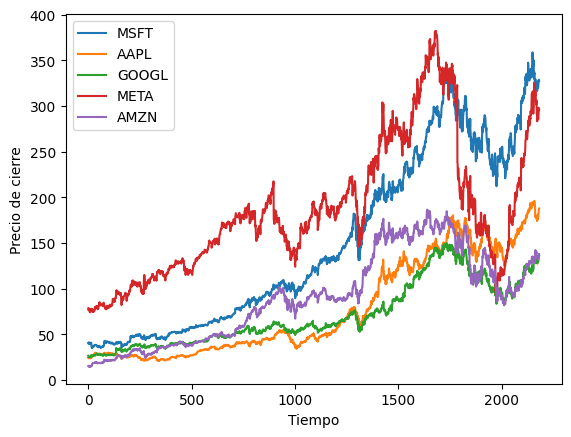

In [ ]:
for i in range(len(datos)-2):
  plt.plot(range(len(datos[i])),datos[i],label = indices[i])
plt.xlabel('Tiempo')
plt.ylabel('Precio de cierre')
plt.legend()
plt.show()

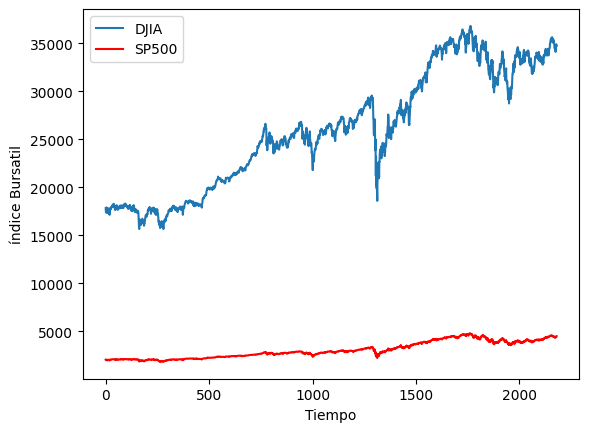

In [ ]:
plt.plot(range(len(datos[0])),datos[5].dropna(),label = indice_bursatil[0])
plt.plot(range(len(datos[0])),datos[6].dropna(),label = indice_bursatil[1],color='red')
plt.xlabel('Tiempo')
plt.ylabel('índice Bursatil')
plt.legend()
plt.show()

>
##Preparar los datos para los algoritmos de Machine Learning


Eliminamos los datos vacios

In [ ]:
for i in range(len(datos)):
  datos[i] = datos[i].dropna()
for df in datos:
 df.reset_index(drop=True, inplace=True)

for i in range(len(test)):
  test[i] = test[i].dropna()
for df in test:
 df.reset_index(drop=True, inplace=True)

In [ ]:
for i in datos:
  i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MSFT    2181 non-null   float64
dtypes: float64(1)
memory usage: 17.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2181 non-null   float64
dtypes: float64(1)
memory usage: 17.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOOGL   2181 non-null   float64
dtypes: float64(1)
memory usage: 17.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   META    2181 non-null   float64
dtypes: f

juntamos las filas para tenerlo en forma de tabla

In [ ]:
datos = pd.concat(datos,axis=1)
test = pd.concat(test,axis=1)
datos

,MSFT,AAPL,GOOGL,META,AMZN,DJIA,SP500
0,40.534847,24.498678,26.477501,78.449997,15.426000,17832.99,2058.20
1,40.162090,23.808514,25.973000,77.190002,15.109500,17501.65,2020.58
2,39.572620,23.810760,25.332001,76.150002,14.764500,17371.64,2002.61
3,40.075394,24.144634,25.257500,76.150002,14.921000,17584.52,2025.90
4,41.254353,25.072330,25.345501,78.180000,15.023000,17907.87,2062.14
...,...,...,...,...,...,...,...
2176,322.980011,178.610001,129.880005,285.500000,133.259995,34346.90,4405.71
2177,323.700012,180.190002,131.009995,290.260010,133.139999,34559.98,4433.31
2178,328.410004,184.119995,134.570007,297.989990,134.910004,34852.67,4497.63
2179,328.790009,187.649994,135.880005,295.100006,135.070007,34890.24,4514.87


definimos algunas funciones para el procesamiento

In [ ]:
def Normalizar(datos, min, max):
  return (datos - min) / (max - min)

In [ ]:
def Normalizar_entrenamiento(datos):
  min = datos.min().min()
  max = datos.max().max()
  datos = (datos - min) / (max - min)
  return datos, min, max

In [ ]:
def ECM (Y_test,predic):
  return ((Y_test - predic) ** 2).mean()

normalizamos los datos

In [ ]:
datos, min1, max1 = Normalizar_entrenamiento(datos)
test = Normalizar(test,min1,max1)

definimos un time delay

In [ ]:
def ventana_temporal(time_delay,datos_):
  datos_temp = []

  # Eliminamos un dato random si la ventana no coincide
  for i in range(len(datos_[0])%time_delay):
    indice = int(random.random()*len(datos_[0]))
    datos_ = np.delete(datos_,indice,axis=1)

  # Transponemos las columnas en columnas de n(time_delay)
  for i in datos_:
      datos_temp.append(i.reshape(-1,time_delay))
  X = np.hstack(datos_temp)

  # Pasamos los resultados dados n(time_delay) elementos pasados
  Y = np.array([])
  for i in X:
    Y = np.append(Y,i[0])

  # Retornamos la matriz que une todo
  return X[:-1], Y[1:].reshape(-1,1)

In [ ]:
X, Y = ventana_temporal(time_delay,datos.values.T)
X_P, Y_P = ventana_temporal(time_delay,test.values.T)

función general del procesamiento, nos ayudara a realizar los experimentos

In [ ]:
def procesamiento_datos(datos,test,time_delay):
  for i in range(len(datos)):
    datos[i] = datos[i].dropna()
  for df in datos:
    df.reset_index(drop=True, inplace=True)

  for i in range(len(test)):
    test[i] = test[i].dropna()
  for df in test:
    df.reset_index(drop=True, inplace=True)

  datos = pd.concat(datos,axis=1)
  test = pd.concat(test,axis=1)

  datos, min1, max1 = Normalizar_entrenamiento(datos)
  test = Normalizar(test,min1,max1)

  X, Y = ventana_temporal(time_delay,datos.values.T)
  X_P, Y_P = ventana_temporal(time_delay,test.values.T)

  return X, Y, X_P, Y_P

>
## Seleccionamos y entrenamos un modelo

Definimos nuestras regresiones

In [ ]:
class Regresion:

  def __init__(self,tipo):
    self.tipo = tipo
    self.min = 0
    self.max = 0

# Funciones Fit, validar, Predict

  def fit(self, X, Y, train = 0.7 , iter = 200, ratio = 0.1, seed = 1):
    # Seleccionamos el algoritmo de regresion
    if self.tipo == 'M':
      self.theta = self.Reg_Matrix(X, Y)
    elif self.tipo in ['L' ,'Log']:
      self.theta = self.Regresion_lineal(X, Y, iter, ratio)
    else:
      print("Valor invalido")

  def validar(self, delta = 0.5):

    X = self.exp[1][self.columnas_entrada]
    Y = self.exp[1][self.columna_salida]

    predict_Y = self.predict(X)
    if self.tipo == 'Log':
      predict_Y = self.decision(predict_Y, delta)

    return self.ECM(predict_Y, Y)

  def predict (self,datos):
    datos_ = datos.copy()
    datos_ = np.insert(datos_,0,0,axis=1)
    return self.h0(self.theta,datos_)

# Modelos de regresion

  def Reg_Matrix(self, x_, y):
    x = x_.copy()
    x = np.insert(x,0,0,axis=1)
    theta = np.dot(np.dot(np.linalg.pinv(np.dot(x.T,x)),x.T),y)
    return theta

  def Regresion_lineal(self, columnas_entrada, columna_salida, iteraciones, aprendizaje):

    # Seteamos algunos parametros iniciales
    variables = columnas_entrada.shape[1] + 1
    theta = np.zeros(variables).reshape(variables,1) # Se le agrega el x0 = 1
    cantidad_datos = columnas_entrada.shape[0]
    y = columna_salida
    x = columnas_entrada.copy()
    x = np.insert(x,0,0,axis=1)

    # Realizamos el entrenamiento
    while iteraciones:
      iteraciones -= 1

      # Entrenamos cada theta
      for O in range(theta.shape[0]):
        costo = sum( (self.h0(theta,x)-y) * x[:,O].reshape(-1,1))
        theta[O] -= aprendizaje / cantidad_datos * costo

    return theta.reshape(variables,1)

# Funciones auxiliares

  def decision(self, Y_pred, delta):
    for i in range(Y_pred.shape[0]):
        Y_pred[i] = Y_pred[i] > delta
    return Y_pred

  def h0(self,x,theta):
    if self.tipo == 'Log':
      return 1 / ( 1 + np.exp(-(np.dot(theta,x))))
    return np.dot(theta,x)

  def division_datos(self, entrenamiento, data, seed = 1):
    entrenamiento = int(entrenamiento*len(data))
    prueba = len(data) - entrenamiento

    entrenamiento = data.sample(n=entrenamiento, random_state = seed)
    prueba = data.drop(entrenamiento.index)

    return [entrenamiento,prueba]

  def Normalizar_entrenamiento(self, datos):
    min = datos.min().min()
    max = datos.max().max()
    datos = (datos - min) / (max - min)
    return datos, min, max

  def Normalizar(self, datos, min, max):
    return (datos - min) / (max - min)

  def ECM (self, Y_test,predic):
    return ((Y_test - predic) ** 2).mean().values[0]

  def show(self):
    X = self.exp[1][self.columnas_entrada]
    Y = self.exp[1][self.columna_salida]

    predict_Y = self.predict(X)
    if self.tipo == 'Log':
      predict_Y = self.decision(predict_Y, 0.5)
    plt.scatter(X.values[:,0],Y)
    plt.scatter(X.values[:,0],predict_Y,color='red')
    plt.show()

definimos la función para realizar los experimentos

In [ ]:
def exp(empresas,indice_bursatil,time_delay):
  indices = empresas+indice_bursatil

  start_date = datetime.datetime(2015, 1, 1)
  end_date = datetime.datetime(2023, 8, 31)
  end_date2 = datetime.datetime(2023, 9 , 1)
  datos = extraer_datos(start_date,end_date,end_date2,empresas,indice_bursatil)

  start_date = datetime.datetime(2023, 9, 1)
  end_date = datetime.datetime(2023, 9, 30)
  end_date2 = datetime.datetime(2023, 10 , 1)
  test = extraer_datos(start_date,end_date,end_date2,empresas,indice_bursatil)

  return procesamiento_datos(datos,test,time_delay)

In [ ]:
def comparar_modelos(X,Y,X_P,Y_P):
  modelo = Regresion(tipo='L')
  modelo.fit(X,Y)
  Y_predic = modelo.predict(X_P)
  Res_Lineal_Iter = ECM(Y_P,Y_predic)

  modelo = Regresion(tipo='M')
  modelo.fit(X,Y)
  Y_predic = modelo.predict(X_P)
  Res_Lineal_Mx = ECM(Y_P,Y_predic)

  svm_reg = SVR(kernel="linear")
  svm_reg.fit(X, Y)
  Y_predic = svm_reg.predict(X_P)
  Y_predic = Y_predic.reshape(Y_predic.shape[0],1)
  Res_Lineal_skSVR = ECM(Y_P, Y_predic)

  lin_reg = LinearRegression()
  lin_reg.fit(X, Y)
  Y_predic = lin_reg.predict(X_P)
  Res_Lineal_skLin = ECM(Y_P, Y_predic)

  print(Res_Lineal_Iter,"","Modelo iterativo")
  print(Res_Lineal_Mx,"","Modelo matricial")
  print(Res_Lineal_skLin,"","Modelo lineal de skl")
  print(Res_Lineal_skSVR,"","Modelo SVR de skl")

In [ ]:
for i in range(1,11):
  print("Ventana de: ",i)
  X, Y, X_P, Y_P = exp(empresas,indice_bursatil,i)
  comparar_modelos(X,Y,X_P,Y_P)

Ventana de:  1


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


9.701900236251529e-06  Modelo iterativo
1.2272008925450453e-08  Modelo matricial
1.265813618660075e-08  Modelo lineal de skl
1.2361864892539937e-05  Modelo SVR de skl
Ventana de:  2


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


9.596599400255098e-06  Modelo iterativo
1.676440694068336e-08  Modelo matricial
1.8069250861338753e-08  Modelo lineal de skl
1.271259615037294e-05  Modelo SVR de skl
Ventana de:  3


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


9.539773914501231e-06  Modelo iterativo
5.292841912520358e-09  Modelo matricial
5.108106008480443e-09  Modelo lineal de skl
1.2229007399277008e-05  Modelo SVR de skl
Ventana de:  4


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


9.644355673652202e-06  Modelo iterativo
1.8256056986734382e-08  Modelo matricial
1.8564133490651722e-08  Modelo lineal de skl
1.2872919872800786e-05  Modelo SVR de skl
Ventana de:  5


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


9.923293090110664e-06  Modelo iterativo
8.317080102727603e-10  Modelo matricial
7.433154937860091e-10  Modelo lineal de skl
1.4161167094762672e-05  Modelo SVR de skl
Ventana de:  6


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


9.541272683054968e-06  Modelo iterativo
8.275270524308514e-09  Modelo matricial
1.0737191726519912e-08  Modelo lineal de skl
1.3556262083656986e-05  Modelo SVR de skl
Ventana de:  7


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


8.477066486946677e-06  Modelo iterativo
1.689063636424605e-07  Modelo matricial
1.6358855457983672e-07  Modelo lineal de skl
1.2036157500449351e-05  Modelo SVR de skl
Ventana de:  8


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.1575864542003447e-05  Modelo iterativo
2.99606202971703e-09  Modelo matricial
5.151084974259512e-09  Modelo lineal de skl
1.52119614019101e-05  Modelo SVR de skl
Ventana de:  9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


9.789307629297611e-06  Modelo iterativo
2.1199081997161495e-09  Modelo matricial
3.0092885570125854e-09  Modelo lineal de skl
1.3967816234594852e-05  Modelo SVR de skl
Ventana de:  10
9.931589417175788e-06  Modelo iterativo
2.523792828948758e-08  Modelo matricial
2.5897068268421524e-08  Modelo lineal de skl
1.4441055260628189e-05  Modelo SVR de skl


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Usaremos una venta de 5, ya que precenta los mejores tiempos

Ahora compararemos los modelos con respecto a las empresas, para ver que caracteristicas mejoran el rendimiento

In [ ]:
empresas = ["MSFT","AAPL","GOOGL","META","AMZN"]
indice_bursatil = ['DJIA','SP500']
time_delay = 5
X, Y, X_P, Y_P = exp(empresas,indice_bursatil,time_delay)
comparar_modelos(X,Y,X_P,Y_P)

9.924122063312024e-06  Modelo iterativo
1.559452051829115e-09  Modelo matricial
1.4752958546310376e-09  Modelo lineal de skl
1.416116904242415e-05  Modelo SVR de skl


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
empresas = ["MSFT","AAPL","GOOGL","META"]
indice_bursatil = ['DJIA','SP500']
time_delay = 5
X, Y, X_P, Y_P = exp(empresas,indice_bursatil,time_delay)
comparar_modelos(X,Y,X_P,Y_P)

1.021601587502153e-05  Modelo iterativo
6.893766550918635e-10  Modelo matricial
6.441918058097683e-10  Modelo lineal de skl
1.4166157270772382e-05  Modelo SVR de skl


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
empresas = ["MSFT","AAPL","GOOGL"]
indice_bursatil = ['DJIA','SP500']
time_delay = 5
X, Y, X_P, Y_P = exp(empresas,indice_bursatil,time_delay)
comparar_modelos(X,Y,X_P,Y_P)

1.0212700485332565e-05  Modelo iterativo
1.6831220739727243e-09  Modelo matricial
1.6814041558381689e-09  Modelo lineal de skl
1.4166157660441918e-05  Modelo SVR de skl


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
empresas = ["MSFT","AAPL","META"]
indice_bursatil = ['DJIA','SP500']
time_delay = 5
X, Y, X_P, Y_P = exp(empresas,indice_bursatil,time_delay)
comparar_modelos(X,Y,X_P,Y_P)

1.0219984272374701e-05  Modelo iterativo
5.124544194261862e-09  Modelo matricial
5.084764913506293e-09  Modelo lineal de skl
1.4166157660441918e-05  Modelo SVR de skl


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
empresas = ["MSFT","GOOGL","META"]
indice_bursatil = ['DJIA','SP500']
time_delay = 5
X, Y, X_P, Y_P = exp(empresas,indice_bursatil,time_delay)
comparar_modelos(X,Y,X_P,Y_P)

1.0401649422952654e-05  Modelo iterativo
1.2680867733608969e-09  Modelo matricial
1.3017092693390946e-09  Modelo lineal de skl
1.4169259125934325e-05  Modelo SVR de skl


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
empresas = ["MSFT","AAPL","GOOGL","META"]
indice_bursatil = ['DJIA']
time_delay = 5
X, Y, X_P, Y_P = exp(empresas,indice_bursatil,time_delay)
comparar_modelos(X,Y,X_P,Y_P)

1.0295480998328605e-05  Modelo iterativo
3.1044958396137938e-09  Modelo matricial
3.252895244070099e-09  Modelo lineal de skl
1.4166157666319134e-05  Modelo SVR de skl


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
empresas = ["MSFT","AAPL","GOOGL","META"]
indice_bursatil = ['SP500']
time_delay = 5
X, Y, X_P, Y_P = exp(empresas,indice_bursatil,time_delay)
comparar_modelos(X,Y,X_P,Y_P)

0.00040472046513904324  Modelo iterativo
9.41040792211266e-08  Modelo matricial
1.0046169796528742e-07  Modelo lineal de skl
0.0008401706364373956  Modelo SVR de skl


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Tras revisar las variables, seleccionamos la mejor combinación

In [ ]:
empresas = ["MSFT","AAPL","GOOGL","META"]
indice_bursatil = ['DJIA','SP500']
time_delay = 5
X, Y, X_P, Y_P = exp(empresas,indice_bursatil,time_delay)
comparar_modelos(X,Y,X_P,Y_P)

1.0216865295069267e-05  Modelo iterativo
6.045144231838307e-10  Modelo matricial
5.685481638234334e-10  Modelo lineal de skl
1.4166157273710959e-05  Modelo SVR de skl


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Las empresas que mejoran el modelo son Apple, Google y META (Facebook), los dos indices bursatiles mejoran el modelo, y el mejor time_delay es 5.

En cuanto a los modelos el modelo matricial compite bien con el lineal de skl, pero este ultimo es mejor